In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# transformers to impute missing data with sklearn:

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# to split the datasets
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# We use only the following variables for the demo,
# 3 of which contain NA:

cols_to_use = [
    "BsmtQual",
    "FireplaceQu",
    "MSZoning",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "Street",
    "Alley",
    "SalePrice",
]

In [29]:
# let's load the House Prices dataset

data = pd.read_csv("/content/drive/MyDrive/Feature Engineering/Datasets/houseprice.csv", usecols=cols_to_use)

data.head()

,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,SalePrice
0,RL,65.0,Pave,NaN,196.0,Gd,150,NaN,208500
1,RL,80.0,Pave,NaN,0.0,Gd,284,TA,181500
2,RL,68.0,Pave,NaN,162.0,Gd,434,TA,223500
3,RL,60.0,Pave,NaN,0.0,TA,540,Gd,140000
4,RL,84.0,Pave,NaN,350.0,Gd,490,TA,250000


In [30]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [31]:
# let's check the misssing data

X_train.isnull().mean()

MSZoning       0.000000
LotFrontage    0.184932
Street         0.000000
Alley          0.939335
MasVnrArea     0.004892
BsmtQual       0.023483
BsmtUnfSF      0.000000
FireplaceQu    0.467710
dtype: float64

In [32]:
# Now we impute the missing values with SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

# we fit the imputer to the train set
# the imputer will learn the mode of ALL variables,
# categorical or not.
imputer.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [33]:
# we can look at the learned frequent values like this:
imputer.statistics_

array(['RL', 60.0, 'Pave', 'Pave', 0.0, 'TA', 0, 'Gd'], dtype=object)

In [34]:
# and we can obtain the frequent values ourselves
# to corroborate that the imputer did a good job:

X_train.mode()

,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu
0,RL,60.0,Pave,Pave,0.0,TA,0,Gd


In [35]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([['RL', 60.0, 'Pave', ..., 'Gd', 318, 'Gd'],
       ['RL', 60.0, 'Pave', ..., 'Gd', 288, 'Gd'],
       ['RL', 50.0, 'Pave', ..., 'TA', 162, 'Gd'],
       ...,
       ['RM', 68.0, 'Pave', ..., 'TA', 0, 'Gd'],
       ['RL', 60.0, 'Pave', ..., 'Gd', 1374, 'TA'],
       ['RL', 58.0, 'Pave', ..., 'Gd', 1195, 'Gd']], dtype=object)

In [36]:
# If we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

X_train = pd.DataFrame(
    X_train,
    columns=imputer.get_feature_names_out(),  # the variable names
)

X_train.head()

,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu
0,RL,60.0,Pave,Pave,573.0,Gd,318,Gd
1,RL,60.0,Pave,Pave,0.0,Gd,288,Gd
2,RL,50.0,Pave,Pave,0.0,TA,162,Gd
3,RL,60.0,Pave,Pave,0.0,TA,356,Gd
4,RL,60.0,Pave,Pave,0.0,TA,0,Gd


In [37]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

In [38]:
imputer = SimpleImputer(strategy="most_frequent").set_output(transform="pandas")

In [39]:
# We fit the imputer to the train set.

imputer.fit(X_train)

SimpleImputer(strategy='most_frequent')

In [40]:
# the learn mean values:

imputer.statistics_

array(['RL', 60.0, 'Pave', 'Pave', 0.0, 'TA', 0, 'Gd'], dtype=object)

In [41]:
# impute missing data

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# the resulting dataframe
X_train.head()

,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu
64,RL,60.0,Pave,Pave,573.0,Gd,318,Gd
682,RL,60.0,Pave,Pave,0.0,Gd,288,Gd
960,RL,50.0,Pave,Pave,0.0,TA,162,Gd
1384,RL,60.0,Pave,Pave,0.0,TA,356,Gd
1100,RL,60.0,Pave,Pave,0.0,TA,0,Gd


In [42]:
# check missing values

X_train.isnull().sum()

MSZoning       0
LotFrontage    0
Street         0
Alley          0
MasVnrArea     0
BsmtQual       0
BsmtUnfSF      0
FireplaceQu    0
dtype: int64

In [43]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

In [44]:
# let's look at the missing values

X_train.isnull().mean()

MSZoning       0.000000
LotFrontage    0.184932
Street         0.000000
Alley          0.939335
MasVnrArea     0.004892
BsmtQual       0.023483
BsmtUnfSF      0.000000
FireplaceQu    0.467710
dtype: float64

In [45]:
# first we need to make lists, indicating which features
# will be imputed with each method

features_numeric = [
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
]
features_categoric = ["BsmtQual", "FireplaceQu", "MSZoning", "Street", "Alley"]

# then we put the features list and the transformers
# to the column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric_imputer", SimpleImputer(strategy="mean"), features_numeric),
        (
            "categoric_imputer",
            SimpleImputer(strategy="most_frequent"),
            features_categoric,
        ),
    ]
)

In [46]:
preprocessor.set_output(transform="pandas")

ColumnTransformer(transformers=[('numeric_imputer', SimpleImputer(),
                                 ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
                                ('categoric_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['BsmtQual', 'FireplaceQu', 'MSZoning',
                                  'Street', 'Alley'])])

In [48]:
# we can explore the transformers like this:

preprocessor.transformers

[('numeric_imputer',
  SimpleImputer(),
  ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
 ('categoric_imputer',
  SimpleImputer(strategy='most_frequent'),
  ['BsmtQual', 'FireplaceQu', 'MSZoning', 'Street', 'Alley'])]

In [49]:
# and we can look at the learned parameters like this:

# for the mean imputer
preprocessor.named_transformers_["numeric_imputer"].statistics_

array([565.99217221,  69.66866747, 103.55358899])

In [50]:
# and we can corroborate the value with those in
# the train set:

X_train[features_numeric].mean()

BsmtUnfSF      565.992172
LotFrontage     69.668667
MasVnrArea     103.553589
dtype: float64

In [51]:
# for frequent category imputer

preprocessor.named_transformers_["categoric_imputer"].statistics_

array(['TA', 'Gd', 'RL', 'Pave', 'Pave'], dtype=object)

In [52]:
# and we corroborate those values in the train set

X_train[features_categoric].mode()

,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,TA,Gd,RL,Pave,Pave


In [53]:
# and now we can impute the data

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [25]:
# and now we can impute the data

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train.head()

,imputer_LotFrontAge__LotFrontage,imputer_MasVnrArea__MasVnrArea,imputer_GarageYrBlt__GarageYrBlt
64,999.0,573.0,1998.0
682,999.0,0.0,1996.0
960,50.0,0.0,1700.0
1384,60.0,0.0,1939.0
1100,60.0,0.0,1930.0


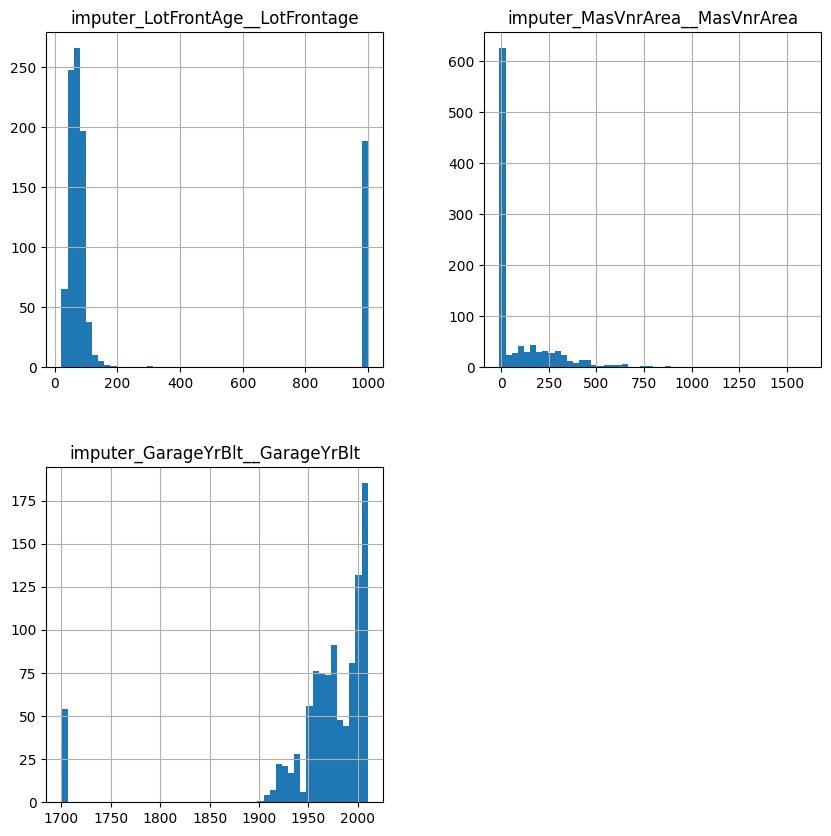

In [26]:
X_train.hist(bins=50, figsize=(10, 10))

plt.show()